In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Reading CSV file and sampling data
dataframe = pd.read_csv('winequality-white.csv',sep=';')#This csv file is separated by ; instead of ,
dataframe.head()
# dataframe.shape (4898,12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [21]:
X = dataframe[['pH','alcohol','citric acid']].values

y = dataframe['quality'].values


In [15]:
print(X.shape)
print(y.shape)

(4898, 3)
(4898,)


In [22]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.2, stratify=y)

In [23]:
print("X_train shape:", X_train.shape)
print("y_train length:", len(y_train))

X_train shape: (979, 3)
y_train length: 979


In [39]:
knn = KNeighborsClassifier(23)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [40]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.4980862464914519


In [41]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

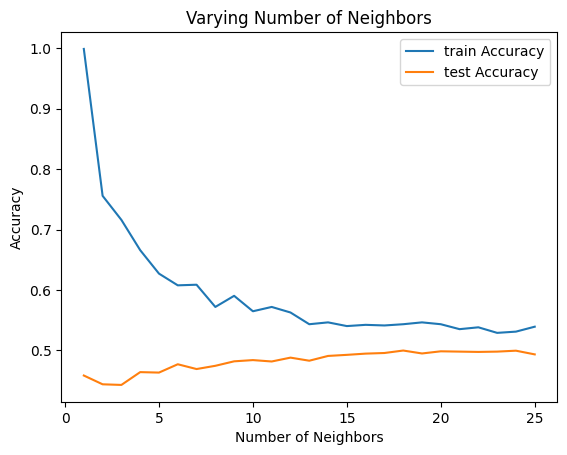

In [42]:
plt.title("Varying Number of Neighbors")
plt.plot(neighbors,train_accuracies.values(), label="train Accuracy")
plt.plot(neighbors,test_accuracies.values(), label="test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()